In [3]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [6]:
filename = 'KaggleV2-May-2016.csv'
no_show = pd.read_csv(filename, encoding='latin')

In [7]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
no_show = no_show.drop(['day_of_week'], axis=1)

In [9]:
print(no_show['no_show'].sum())
print(no_show['no_show'].count())
1.0 - no_show['no_show'].sum() / no_show['no_show'].count()

22319
110527


0.798067440534892

In [8]:
lb_Encoder = LabelEncoder()
no_show['Neighbourhood_category'] = lb_Encoder.fit_transform(no_show['Neighbourhood'])
no_show['Gender_category'] = lb_Encoder.fit_transform(no_show['Gender'])
no_show['no_show'] = no_show['No-show'] == 'Yes'
no_show['scheduled_hour'] = pd.DatetimeIndex(no_show['ScheduledDay']).hour

In [18]:
print(no_show.head())
no_show.describe()

      PatientId  AppointmentID Gender         ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29 18:38:08   
1  5.589980e+14        5642503      M  2016-04-29 16:08:27   
2  4.262960e+12        5642549      F  2016-04-29 16:19:04   
3  8.679510e+11        5642828      F  2016-04-29 17:29:31   
4  8.841190e+12        5642494      F  2016-04-29 16:07:23   

        AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29 00:00:00   62    JARDIM DA PENHA            0             1   
1  2016-04-29 00:00:00   56    JARDIM DA PENHA            0             0   
2  2016-04-29 00:00:00   62      MATA DA PRAIA            0             0   
3  2016-04-29 00:00:00    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29 00:00:00   56    JARDIM DA PENHA            0             1   

   Diabetes       ...                             time_d  \
0         0       ...        -1 days +05:21:52.000000000   
1         0       ...        -1 days +07:51:

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_d_total_seconds,a_day_of_week,s_day_of_week,day_of_week_del,number_of_conditions,Neighbourhood_category,Gender_category,scheduled_hour
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,8.393142e+05,1.858243,1.851955,0.006288,0.321758,41.737286,0.350023,10.774517
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.317088e+06,1.371672,1.378520,1.593223,0.631381,22.361634,0.476979,3.216189
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.681600e+05,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.990850e+04,1.000000,1.000000,0.000000,0.000000,26.000000,0.000000,8.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.001380e+05,2.000000,2.000000,0.000000,0.000000,40.000000,0.000000,10.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.237294e+06,3.000000,3.000000,1.000000,0.000000,60.000000,1.000000,13.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.542714e+07,5.000000,5.000000,5.000000,5.000000,80.000000,1.000000,21.000000


In [30]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_d_total_seconds,a_day_of_week,s_day_of_week,day_of_week_del,number_of_conditions,Neighbourhood_category,Gender_category,scheduled_hour
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,8.527543e+05,1.858243,1.851955,0.006288,0.321758,41.737286,0.350023,10.774517
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.308211e+06,1.371672,1.378520,1.593223,0.631381,22.361634,0.476979,3.216189
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,26.000000,0.000000,8.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.001380e+05,2.000000,2.000000,0.000000,0.000000,40.000000,0.000000,10.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.237294e+06,3.000000,3.000000,1.000000,0.000000,60.000000,1.000000,13.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.542714e+07,5.000000,5.000000,5.000000,5.000000,80.000000,1.000000,21.000000


In [144]:
no_show[no_show[['time_d_total_seconds']] < 0] = 0

TypeError: Cannot do inplace boolean setting on mixed-types with a non np.nan value

In [127]:
no_show['time_d_total_days'] = no_show['time_d_total_seconds']/(24.0*60.0*60.0)
no_show['time_d_total_days'] = no_show['time_d_total_days'].astype(int)

In [128]:
no_show['time_d_total_days'] = no_show['time_d_total_days'].astype(int)

In [98]:
del_days = 120
print(no_show[no_show['time_d_total_days'] > del_days]['no_show'].sum())
print(no_show[no_show['time_d_total_days'] > del_days]['no_show'].count())
no_show[no_show['time_d_total_days'] > del_days]['no_show'].sum() / no_show[no_show['time_d_total_days'] > del_days]['no_show'].count()

29
85


0.3411764705882353

In [130]:
no_show['time_d_total_weeks'] = no_show['time_d_total_seconds']/(24.0*60.0*60.0*7.0)
no_show['time_d_total_weeks'] = no_show['time_d_total_weeks'].astype(int)

In [133]:
no_show[['time_d_total_weeks','time_d_total_days']].describe()

,time_d_total_weeks,time_d_total_days
count,110527.000000,110527.000000
mean,1.083898,9.532739
std,2.036262,15.027729
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,2.000000,14.000000
max,25.000000,178.000000


In [134]:
no_show_grouped = no_show.groupby('time_d_total_weeks')

In [143]:
no_show_grouped['no_show'].agg(np.sum).sum()

22319.0

AttributeError: Unknown property no_show_rate

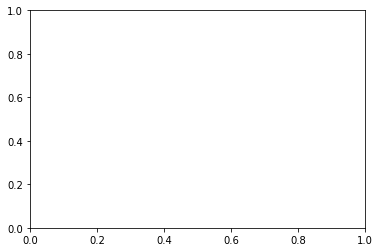

In [119]:
plt.clf()
plt.plot(num_weeks_since_scheduled, no_show_rate, no_show_rate='darkorange', label='No Show rate')
plt.xlabel('Weeks since scheduled')
plt.ylabel('rate')
plt.title('No Show rate')
plt.show()

In [19]:
# From https://docs.python.org/2/library/itertools.html
def powerset(iterable):
    """Returns a list of the power sets of the input array
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3) """
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

In [24]:
# From https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=None, size=None, name='Items'): 
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display
    is_iterator = False 
    
    if size is None:
        try:
            size = len(sequence)
        except TypeError: 
            is_iterator = True

    if size is not None: 
        if every is None:
            if size <= 200: 
                every = 1
            else:
                every = int(size / 200)                # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'
    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1) 
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
    
    index = 0 
    try:
        for index, record in enumerate(sequence, 1): 
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                        )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                            name=name,
                            index=index,
                            size=size
                            ) 
            yield record
    except:
        progress.bar_style = 'danger' 
        raise
    else:
        progress.bar_style = 'success' 
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?') 
        )

In [45]:
np.linspace(0.1, 0.3, 3, endpoint=True) 

array([0.1, 0.2, 0.3])

In [47]:
def run_model(X, y, features, test_size=0.1):
    """Runs the NBC model with the data provide. X = Input
    y = output
    features = the features to use as inputs.
        returns accuracy and auc calculations of best classifier
        """
    fold_count = 5 
    best_classifier = None 
    best_scores = None 
    best_score = 0 
    best_depth = 0
    classifiers = []
    min_samples_splits = np.linspace(0.1, 0.3, 3, endpoint=True) 
    
    #for depth in range(1, len(features)):
    depth = len(features)
    for min_samples_split in min_samples_splits: 
        #classifiers.append(DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=min_samples_split))
        classifiers.append(DecisionTreeClassifier(criterion='gini',max_depth=depth, min_samples_split=min_samples_split))
    
    for classifier in classifiers:
        scores = cross_val_score(classifier, X, y, cv=fold_count) 
        if scores.mean() > best_score:
            best_classifier = classifier
            best_score = scores.mean()
            best_scores = scores
            best_depth = depth
    
    print("best classifier scores:")
    print(scores)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  #can use a smaller test size because decent data set size
    best_classifier.fit(X_train, y_train)
    y_pred = best_classifier.predict(X_test)
    y_proba = best_classifier.predict_proba(X_test)
    print()
    
    misclassified_points = (y_test != y_pred).sum()
    accuracy = (X_test.shape[0] - float(misclassified_points)) / X_test.shape[0]*100
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    auc = roc_auc_score(y_test, y_proba[:,1])
    return accuracy, auc, best_classifier, fpr, tpr

In [48]:
features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', \
            'Neighbourhood_category', 'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week']

In [49]:
X = no_show.as_matrix(columns=features)
y = no_show['no_show'].values
accuracy, auc, tree, fpr, tpr = run_model(X, y, features)
print('Feature count = {}'.format(len(features))) 
print('AUC = {}'.format(auc))
print('Accuracy = {}'.format(accuracy)) 
print('Tree = {}'.format(tree))

best classifier scores:
[0.79806387 0.79806387 0.79806387 0.79805474 0.79809084]

Feature count = 12
AUC = 0.6185672921562314
Accuracy = 80.4035103591785
Tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


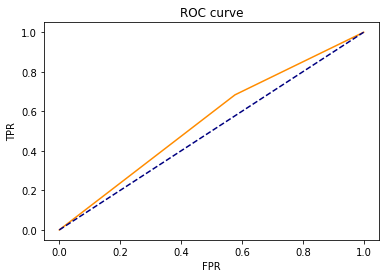

In [50]:
plt.clf()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [43]:
feature_powerset = list(powerset(features))
best_accuracy = 0 
best_accuracy_feature_set = () 
best_accuracy_tree = None 
best_accuracy_auc = 0 
best_accuracy_roc = None

for feature_set in log_progress(feature_powerset, every=1): 
    if len(feature_set) <= 5:
        continue
    X = no_show.as_matrix(columns=feature_set)
    y = no_show['no_show'].values
    print("features: ")
    print(str(feature_set))
    accuracy, auc, tree, fpr, tpr = run_model(X, y, feature_set)

    if accuracy > best_accuracy:
        best_accuracy = accuracy 
        best_accuracy_feature_set = feature_set 
        best_accuracy_tree = tree 
        best_accuracy_auc = auc 
        best_accuracy_fpr = fpr 
        best_accuracy_tpr = tpr
        
        print('Best accuracy = {}'.format(best_accuracy))
        print('Best accuracy tree = {}'.format(best_accuracy_tree))
        print('Best accuracy AUC = {}'.format(best_accuracy_auc))
        print('Best accuracy feature count = {}'.format(len(best_accuracy_feature_set)))
        print('Best accuracy feature set = {}'.format(best_accuracy_feature_set))

features: 
('Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap')
best classifier scores:
[0.79806387 0.79806387 0.79806387 0.79806387 0.79806387 0.79806387
 0.79806387 0.79806387 0.7980456  0.79811782]

Best accuracy = 79.79734008866372
Best accuracy tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best accuracy AUC = 0.5487338195466274
Best accuracy feature count = 6
Best accuracy feature set = ('Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap')
features: 
('Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received')
best classifier scores:
[0.79806387 0.79806387 0.79806387 0.79806387 0.79806387 0.79806387
 0.7980638

KeyboardInterrupt: 

In [41]:
print('Best accuracy = {}'.format(best_accuracy))
print('Best accuracy tree = {}'.format(best_accuracy_tree))
print('Best accuracy AUC = {}'.format(best_accuracy_auc))
print('Best accuracy feature count = {}'.format(len(best_accuracy_feature_set)))
print('Best accuracy feature set = {}'.format(best_accuracy_feature_set))

Best accuracy = 80.97349135981182
Best accuracy tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best accuracy AUC = 0.5036402904071597
Best accuracy feature count = 2
Best accuracy feature set = ('Diabetes', 'Handcap')


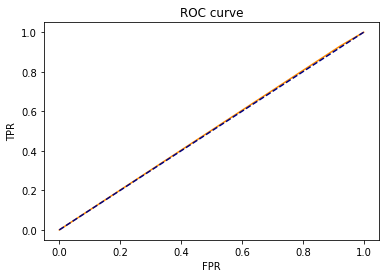

In [42]:
plt.clf()
plt.plot(best_accuracy_fpr, best_accuracy_tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [150]:
print(no_show.head())

      PatientId  AppointmentID Gender         ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29 18:38:08   
1  5.589980e+14        5642503      M  2016-04-29 16:08:27   
2  4.262960e+12        5642549      F  2016-04-29 16:19:04   
3  8.679510e+11        5642828      F  2016-04-29 17:29:31   
4  8.841190e+12        5642494      F  2016-04-29 16:07:23   

        AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29 00:00:00   62    JARDIM DA PENHA            0             1   
1  2016-04-29 00:00:00   56    JARDIM DA PENHA            0             0   
2  2016-04-29 00:00:00   62      MATA DA PRAIA            0             0   
3  2016-04-29 00:00:00    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29 00:00:00   56    JARDIM DA PENHA            0             1   

   Diabetes         ...          a_day_of_week  s_day_of_week  \
0         0         ...                      4              4   
1         0         ...           

In [149]:
no_show.to_csv('KaggleV2-May-2016_with_new_cols_sat_may5_1126am.csv', index=False)

### Random Forrest Classifier

In [ ]:
features  =['Age', 'Scholarship', 'Hipertension', 'Gender_category', 'scheduled_hour']
tree_depth = [2,3,4]
num_trees = [10, 20, 50, 100]
no_show_weight = 200  #what's a good value for this? 
max_features = 'auto' #auto = sqrt(N) or None= N, where N = len(features)
